In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.utils import shuffle
import dt_utils
import nn_utils
import seaborn as sns
from sklearn import model_selection, preprocessing

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
dibosonDF = pd.read_csv('Diboson.csv')
ggH1000DF = pd.read_csv('ggH1000.csv')
topDF = pd.read_csv('Top.csv')
zjetsDF = pd.read_csv('Zjets.csv')
features_interest = ['lep1_pt', 'lep2_pt', 'fatjet_pt', 'fatjet_eta', 'fatjet_D2',
                     'Zll_mass', 'Zll_pt', 'MET', 'reco_zv_mass', 'isSignal', 'FullEventWeight']
dibosonDF = dibosonDF[features_interest]
dibosonDF2 = dibosonDF[(np.abs(zscore(dibosonDF.iloc[:, :-2])) < 3).all(axis=1)]
ggH1000DF = ggH1000DF[features_interest]
ggH1000DF2 = ggH1000DF[(np.abs(zscore(ggH1000DF.iloc[:, :-2])) < 3).all(axis=1)]
topDF = topDF[features_interest]
topDF2 = topDF[(np.abs(zscore(topDF.iloc[:, :-2])) < 3).all(axis=1)]
zjetsDF = zjetsDF[features_interest]
zjetsDF2 = zjetsDF[(np.abs(zscore(zjetsDF.iloc[:, :-2])) < 3).all(axis=1)]

In [2]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

In [113]:
a/b

array([0.25, 0.4 , 0.5 ])

In [3]:
np.concatenate([a, b])

array([1, 2, 3, 4, 5, 6])

In [82]:
x = np.array([2,9,4,8])
weights = np.array([0.1,0.2,0.3,0.4])
bin_edges = np.array([0, 5, 10])

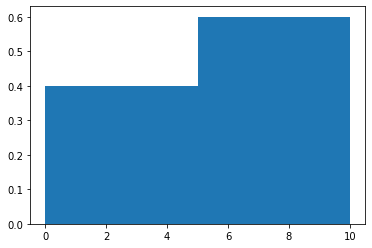

In [83]:
N, _, _ = plt.hist(x,weights=w,bins=bin_edges)

In [109]:
bin_indices = np.digitize(x, bin_edges)

# access elements for first bin
first_bin_ws = w[np.where(bin_indices==1)]

# error of fist bin
error = np.sqrt(np.sum(first_bin_ws**2.))

In [110]:
bin_indices

array([1, 2, 1, 2], dtype=int64)

In [94]:
bin_edges

array([ 0,  5, 10])

In [95]:
bins

array([1, 2, 1, 2], dtype=int64)

In [96]:
first_bin_ws

array([0.1, 0.3])

In [97]:
def calc_sumsq_weights(bin_edges, weights, bin_indices):
    sum_binned_weights = []
    sumsq_binned_weights = []
    for i in range(len(bin_edges)-1):
        binned_weights_i = weights[np.where(bin_indices==i+1)]
        sum_binned_weights.append(np.sum(binned_weights_i))
        sumsq_binned_weights.append(np.sum(binned_weights_i**2))
    return np.array(sum_binned_weights), np.array(sumsq_binned_weights)

In [98]:
sum_binned_weights, sumsq_binned_weights = calc_sumsq_weights(bin_edges, weights, bin_indices)

In [99]:
sum_binned_weights

array([0.4, 0.6])

In [100]:
sumsq_binned_weights

array([0.1, 0.2])

In [107]:
dr = np.array([1, 2, 3])
np.where(dr<3)

(array([0, 1], dtype=int64),)